In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# 0 T-shirt/top
# 1 Trouser
# 2 Pullover
# 3 Dress
# 4 Coat
# 5 Sandal
# 6 Shirt
# 7 Sneaker
# 8 Bag
# 9 Ankle boot


In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("zalando-research/fashionmnist")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'fashionmnist' dataset.
Path to dataset files: /kaggle/input/fashionmnist


In [ ]:
path

'/kaggle/input/fashionmnist'

In [ ]:
df = pd.read_csv(path + "/fashion-mnist_train.csv")

In [ ]:
df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
labels_df = df['label']
images_df = df.drop('label', axis=1)

In [ ]:
train_images_raw = images_df.values
train_label_raw = labels_df.values
train_images = train_images_raw / 255.0
train_labels = one_hot_encode(train_label_raw) #run the one_hot_encode first

In [ ]:
train_labels

array([[0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 1., 0., 0.]])

train_labels

In [ ]:
df2 = pd.read_csv(path + "/fashion-mnist_test.csv")

In [ ]:
df2.shape

(10000, 785)

In [ ]:
test_images = df2.drop('label', axis=1).values / 255.0
test_labels = one_hot_encode(df2['label'].values)

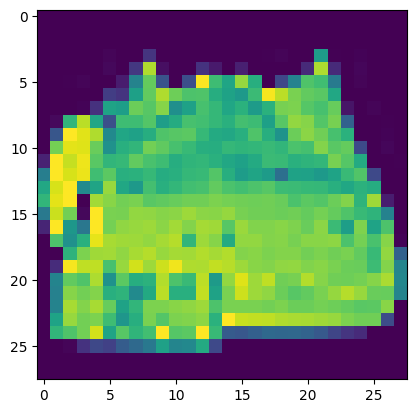

In [ ]:
plt.imshow(images_df.iloc[100].values.reshape(28, 28))

In [ ]:
def one_hot_encode(labels, num_classes=10):
    encoded = np.zeros((labels.size, num_classes))
    encoded[np.arange(labels.size), labels] = 1
    return encoded

In [ ]:
def relu(x):
    return np.maximum(0, x)

def softmax(x):
    exps = np.exp(x - np.max(x, axis=1, keepdims=True))
    return exps / np.sum(exps, axis=1, keepdims=True)

In [ ]:
input_size = 784
hidden_size = 128
output_size = 10

In [ ]:
#one hidden layer
W1 = np.random.randn(input_size, hidden_size) * 0.01 #row,columns
b1 = np.zeros((1, hidden_size))
W2 = np.random.randn(hidden_size, output_size) * 0.01 #connects hidden layer to output
b2 = np.zeros((1, output_size))

In [ ]:
def forward_propagation(X):
    Z1 = np.dot(X, W1) + b1
    A1 = relu(Z1)
    Z2 = np.dot(A1, W2) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

In [ ]:
def cross_entropy_loss(y_true, y_pred):
    m = y_true.shape[0]
    return -np.sum(y_true * np.log(y_pred + 1e-9)) / m #-(1/m)sum(y(true)​⋅log(y(pred)​+10^(−9)))-> log does not become undefined

In [ ]:

def backward_propagation(X, y_true, Z1, A1, Z2, A2):
    m = X.shape[0]
    epsilon = 1e-9

    dL_dA2 = -y_true / (A2 + epsilon)
    dZ2 = A2 - y_true
    # Output layer gradients
    dW2 = np.dot(A1.T, dZ2) / m
    db2 = np.sum(dZ2, axis=0, keepdims=True) / m

    # Hidden layer gradients
    dA1 = np.dot(dZ2, W2.T)
    dZ1 = dA1 * (Z1 > 0)
    dW1 = np.dot(X.T, dZ1) / m
    db1 = np.sum(dZ1, axis=0, keepdims=True) / m

    return dW1, db1, dW2, db2

In [ ]:
def update_parameters(learning_rate):
    global W1, b1, W2, b2
    W1 -= learning_rate * dW1
    b1 -= learning_rate * db1
    W2 -= learning_rate * dW2
    b2 -= learning_rate * db2

In [ ]:
epochs = 1000
learning_rate = 0.1

In [ ]:
for epoch in range(epochs):
    Z1, A1, Z2, A2 = forward_propagation(train_images)
    loss = cross_entropy_loss(train_labels, A2)
    dW1, db1, dW2, db2 = backward_propagation(train_images, train_labels, Z1, A1, Z2, A2)
    update_parameters(learning_rate)

    if epoch % 100 == 0:
        print(f"Epoch {epoch}, Loss: {loss}")

Epoch 0, Loss: 2.3017836338063
Epoch 100, Loss: 0.9072721568069398
Epoch 200, Loss: 0.7365713428406415
Epoch 300, Loss: 0.6372409802093564
Epoch 400, Loss: 0.575875750604903
Epoch 500, Loss: 0.5494107393958269
Epoch 600, Loss: 0.5122424262581742
Epoch 700, Loss: 0.49533944931796137
Epoch 800, Loss: 0.47843532990850124
Epoch 900, Loss: 0.4669774916278066


In [ ]:
def predict(X):
    _, _, _, A2 = forward_propagation(X)
    return np.argmax(A2, axis=1)

def accuracy(y_true, y_pred):
    return np.mean(y_true == y_pred)



In [ ]:
predictions = predict(test_images)
true_labels = np.argmax(test_labels, axis=1)
print(f"Accuracy: {accuracy(true_labels, predictions)}")

Accuracy: 0.8409


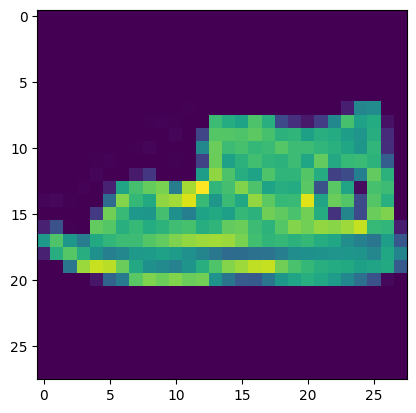

In [ ]:
plt.imshow(test_images[7864].reshape(28,28))

In [ ]:
true_labels[7864]

np.int64(5)

In [ ]:
prediction = predict(test_images[7864])
prediction

array([5])